In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-gmres-intro)

We define a triangular matrix with known eigenvalues and a random vector $\mathbf{b}$.

In [2]:
ev = 10 + arange(1, 101)
A = triu(random.rand(100, 100), 1) + diag(ev)
b = random.rand(100)

Instead of building the Krylov matrices, we use the Arnoldi iteration to generate equivalent orthonormal vectors.

In [3]:
Q, H = FNC.arnoldi(A, b, 60)
print(H[:5, :5])

[[77.14276215 38.49074553  7.5389319   1.39092855  0.45170256]
 [20.65700883 57.3484252  28.60226044  1.71978101 -0.77652805]
 [ 0.         21.80994849 55.7959736  24.70219603  1.34722829]
 [ 0.          0.         22.24894275 57.74488124 26.07193351]
 [ 0.          0.          0.         25.24546482 63.54302246]]


The Arnoldi bases are used to solve the least-squares problems defining the GMRES iterates.

In [4]:
from numpy.linalg import lstsq
resid = zeros(61)
resid[0] = norm(b)
for m in range(1, 61):
    s = hstack([norm(b), zeros(m)])
    z = lstsq(H[: m + 1, :m], s, rcond=None)[0]
    x = Q[:, :m] @ z
    resid[m] = norm(b - A @ x)

The approximations converge smoothly, practically all the way to machine epsilon.

<>:2: SyntaxWarning: invalid escape sequence '\|'
<>:2: SyntaxWarning: invalid escape sequence '\|'
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_12863/580350478.py:2: SyntaxWarning: invalid escape sequence '\|'
  xlabel("$m$"),  ylabel("$\| b-Ax_m \|$")


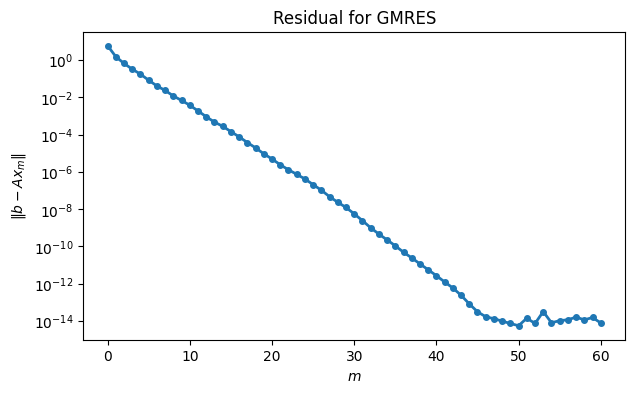

In [5]:
semilogy(range(61), resid, "-o")
xlabel("$m$"),  ylabel("$\| b-Ax_m \|$")
title("Residual for GMRES");